In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../Week 1/exported_data/googleplaystore_clean.csv")

In [11]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Revenue
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,0.0


In [30]:
install_plot = df.groupby("Category")["Installs"].sum().sort_values(ascending=False).reset_index()
price_plot = df.groupby("Category")["Price"].sum().sort_values(ascending=False).reset_index()
df["Revenue"] = df["Installs"] * df["Price"]
revenue_plot = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False).reset_index()

In [5]:
def addlabels(x,y):
    counter_var = 0
    for i in range(len(x)):
        if counter_var <= len(x)/1.5:
            plt.text(i, y[i]//2, format (y[i], ',d'), ha = 'center', rotation=90, va = 'top')
        else:
            plt.text(i, y[i]//2, format (y[i], ',d'), ha = 'center', rotation=90, va = 'bottom')
        counter_var +=1

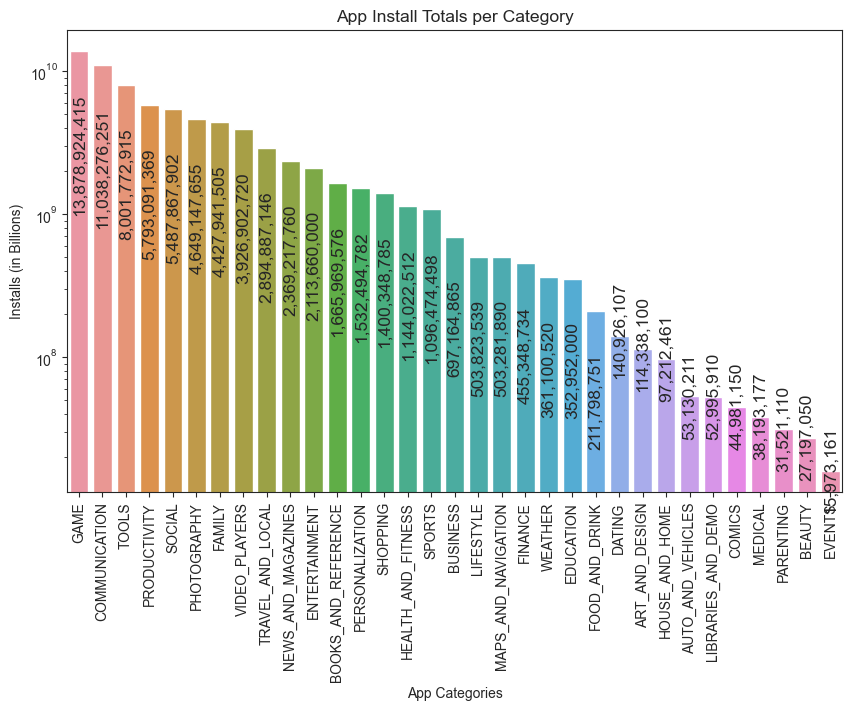

<Figure size 640x480 with 0 Axes>

In [6]:
sns.set_style("ticks")
plt.figure(figsize=(10,6))
sns.barplot(install_plot, x="Category", y="Installs")
sns.set_context("talk", font_scale=0.7)
plt.xticks(rotation=90)
addlabels(install_plot['Category'], install_plot['Installs'])
plt.title("App Install Totals per Category")
plt.ylabel("Installs (in Billions)")
plt.xlabel("App Categories")
plt.yscale("log")
plt.show()
plt.clf()
# Currently looks terrible... I am thinking of redesigning this horizontally

In [29]:
df['Category'] = df['Category'].str.replace('_', ' ')

In [8]:
def shorten_number(num):
    suffixes = ['', 'K', 'M', 'B', 'T']
    order_of_magnitude = 0
    while abs(num) >= 1000 and order_of_magnitude < len(suffixes)-1:
        order_of_magnitude += 1
        num /= 1000.0
    return f'{num:.1f}{suffixes[order_of_magnitude]}'

In [108]:
def shorten_number_dollar(num):
    suffixes = ['', 'K', 'M', 'B', 'T']
    order_of_magnitude = 0
    while abs(num) >= 1000 and order_of_magnitude < len(suffixes)-1:
        order_of_magnitude += 1
        num /= 1000.0
    if num == 0:
        return '$0'
    else: 
        return f'${num:.2f}{suffixes[order_of_magnitude]}'

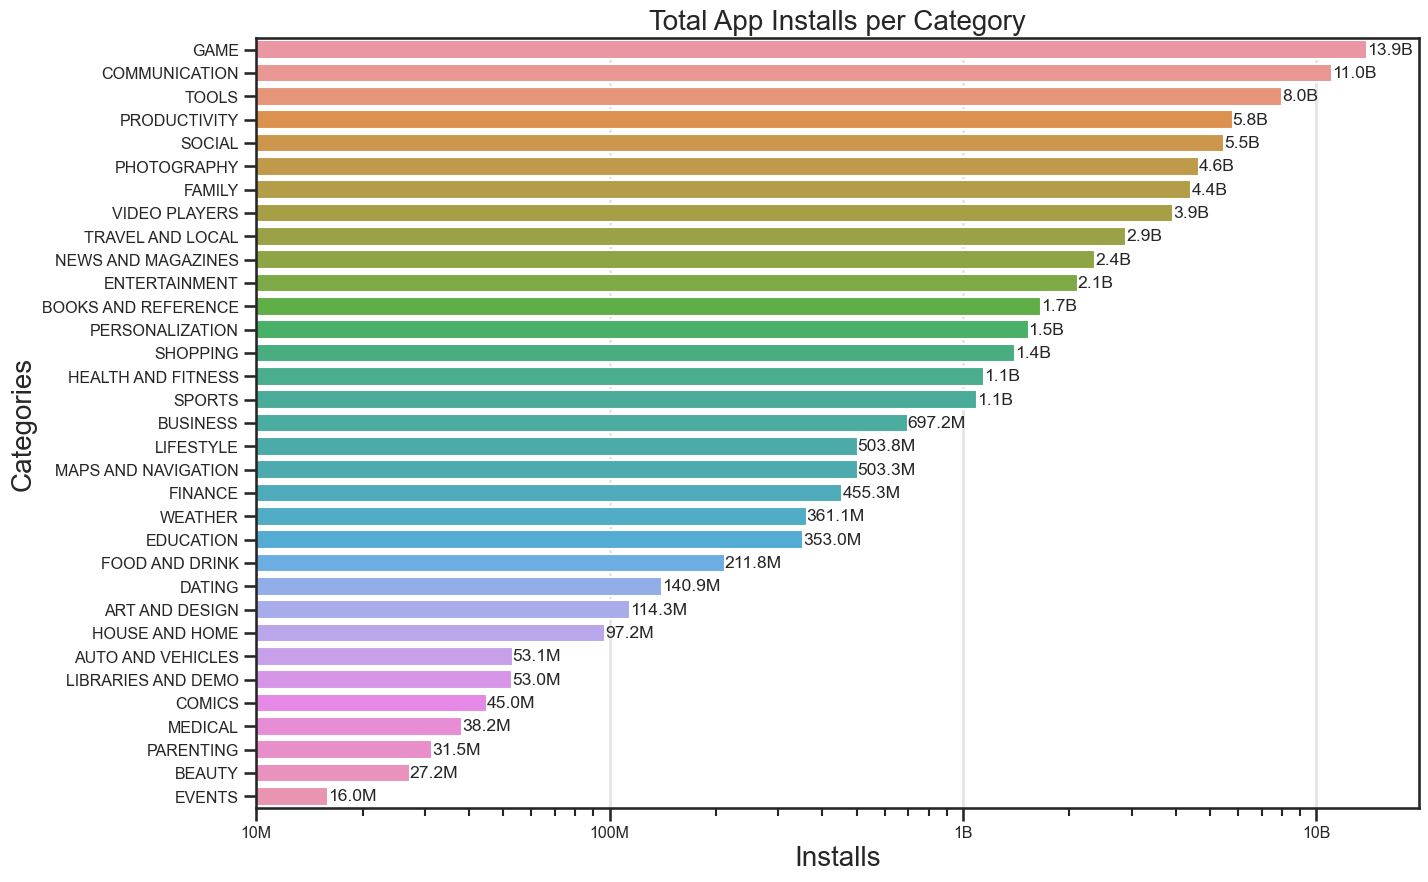

<Figure size 640x480 with 0 Axes>

In [52]:
sns.set_style("ticks")
plt.figure(figsize=(15,10))
sns.barplot(x="Installs", y="Category", data=install_plot, orient='horizontal')
sns.set_context("talk", font_scale=0.7)
plt.title("Total App Installs per Category", fontsize=20)
plt.ylabel("Categories", fontsize=20)
plt.xlabel("Installs", fontsize=20)
plt.xscale("log")

xticks = [10000000, 100000000, 1000000000, 10000000000]
xticklabels = ['10M', '100M', '1B', '10B']
plt.xticks(xticks, xticklabels)

# labels to the right of each bar
for i, val in enumerate(install_plot["Installs"].values):
    plt.text(val, i, shorten_number(val), va='center')    
plt.grid(color = 'black', alpha=0.1, linewidth = 2, axis='x')
plt.show()
plt.clf()


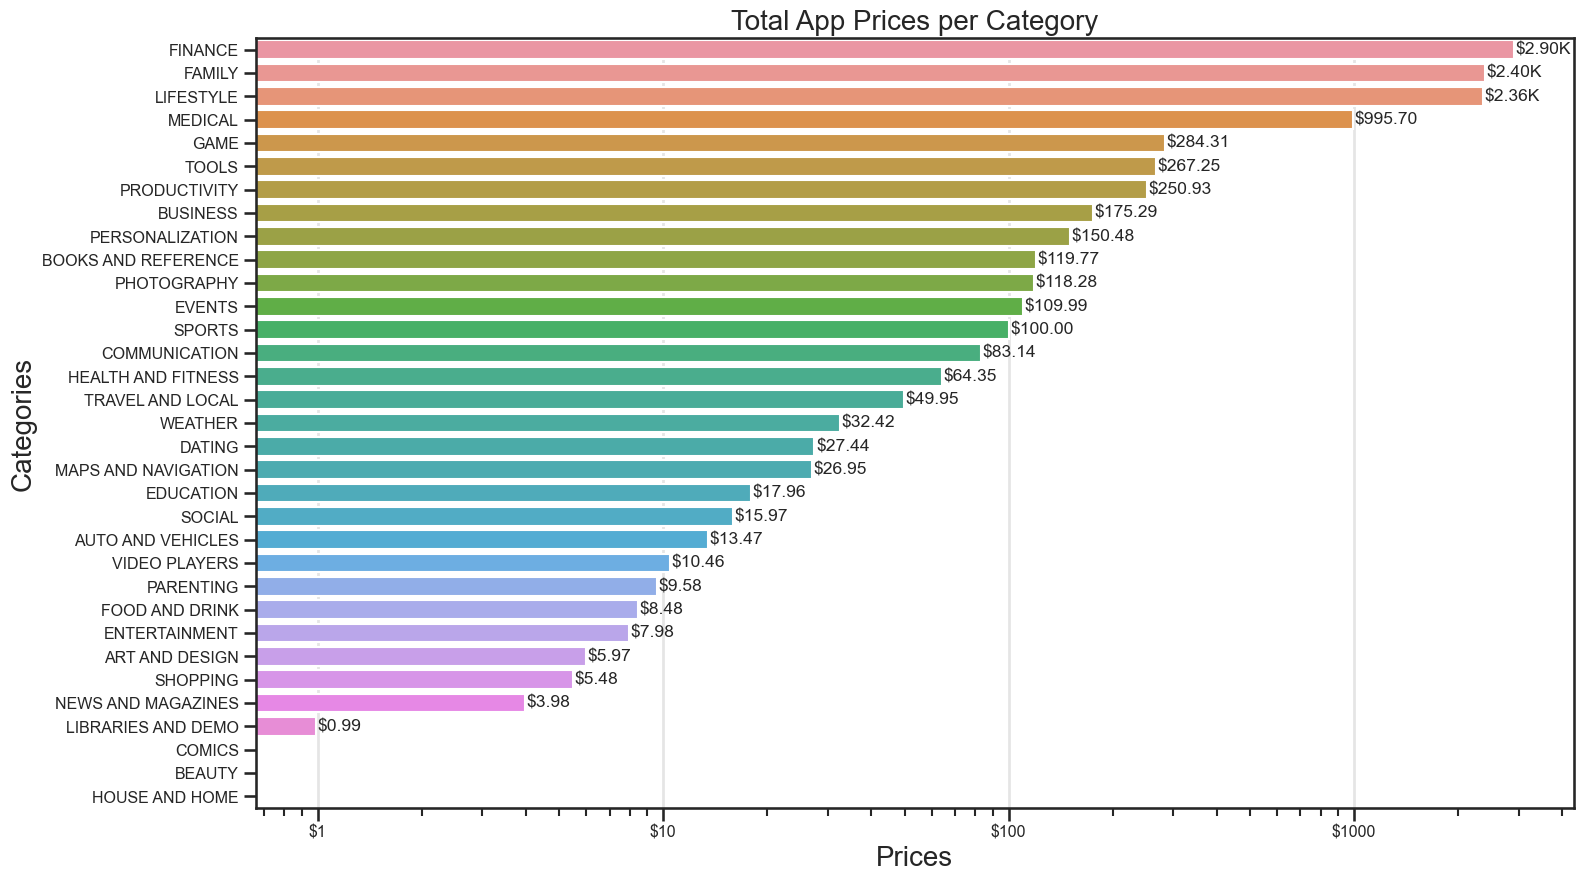

<Figure size 640x480 with 0 Axes>

In [51]:
sns.set_style("ticks")
plt.figure(figsize=(17,10))
sns.barplot(x="Price", y="Category", data=price_plot, orient='horizontal')
sns.set_context("talk", font_scale=0.7)
plt.title("Total App Prices per Category", fontsize=20)
plt.ylabel("Categories", fontsize=20)
plt.xlabel("Prices", fontsize=20)
plt.xscale("log")

xticks = [1, 10, 100, 1000] ## Setting X ticks
xticklabels = ['$1', '$10', '$100', '$1000']
plt.xticks(xticks, xticklabels)

# labels to the right of each bar
for i, val in enumerate(price_plot["Price"].values):
   plt.annotate(shorten_number_dollar(val), xy=(val, i), xytext=(val*1.01, i), va='center')
plt.grid(color = 'black', alpha=0.1, linewidth = 2, axis='x')
plt.show()
plt.clf()

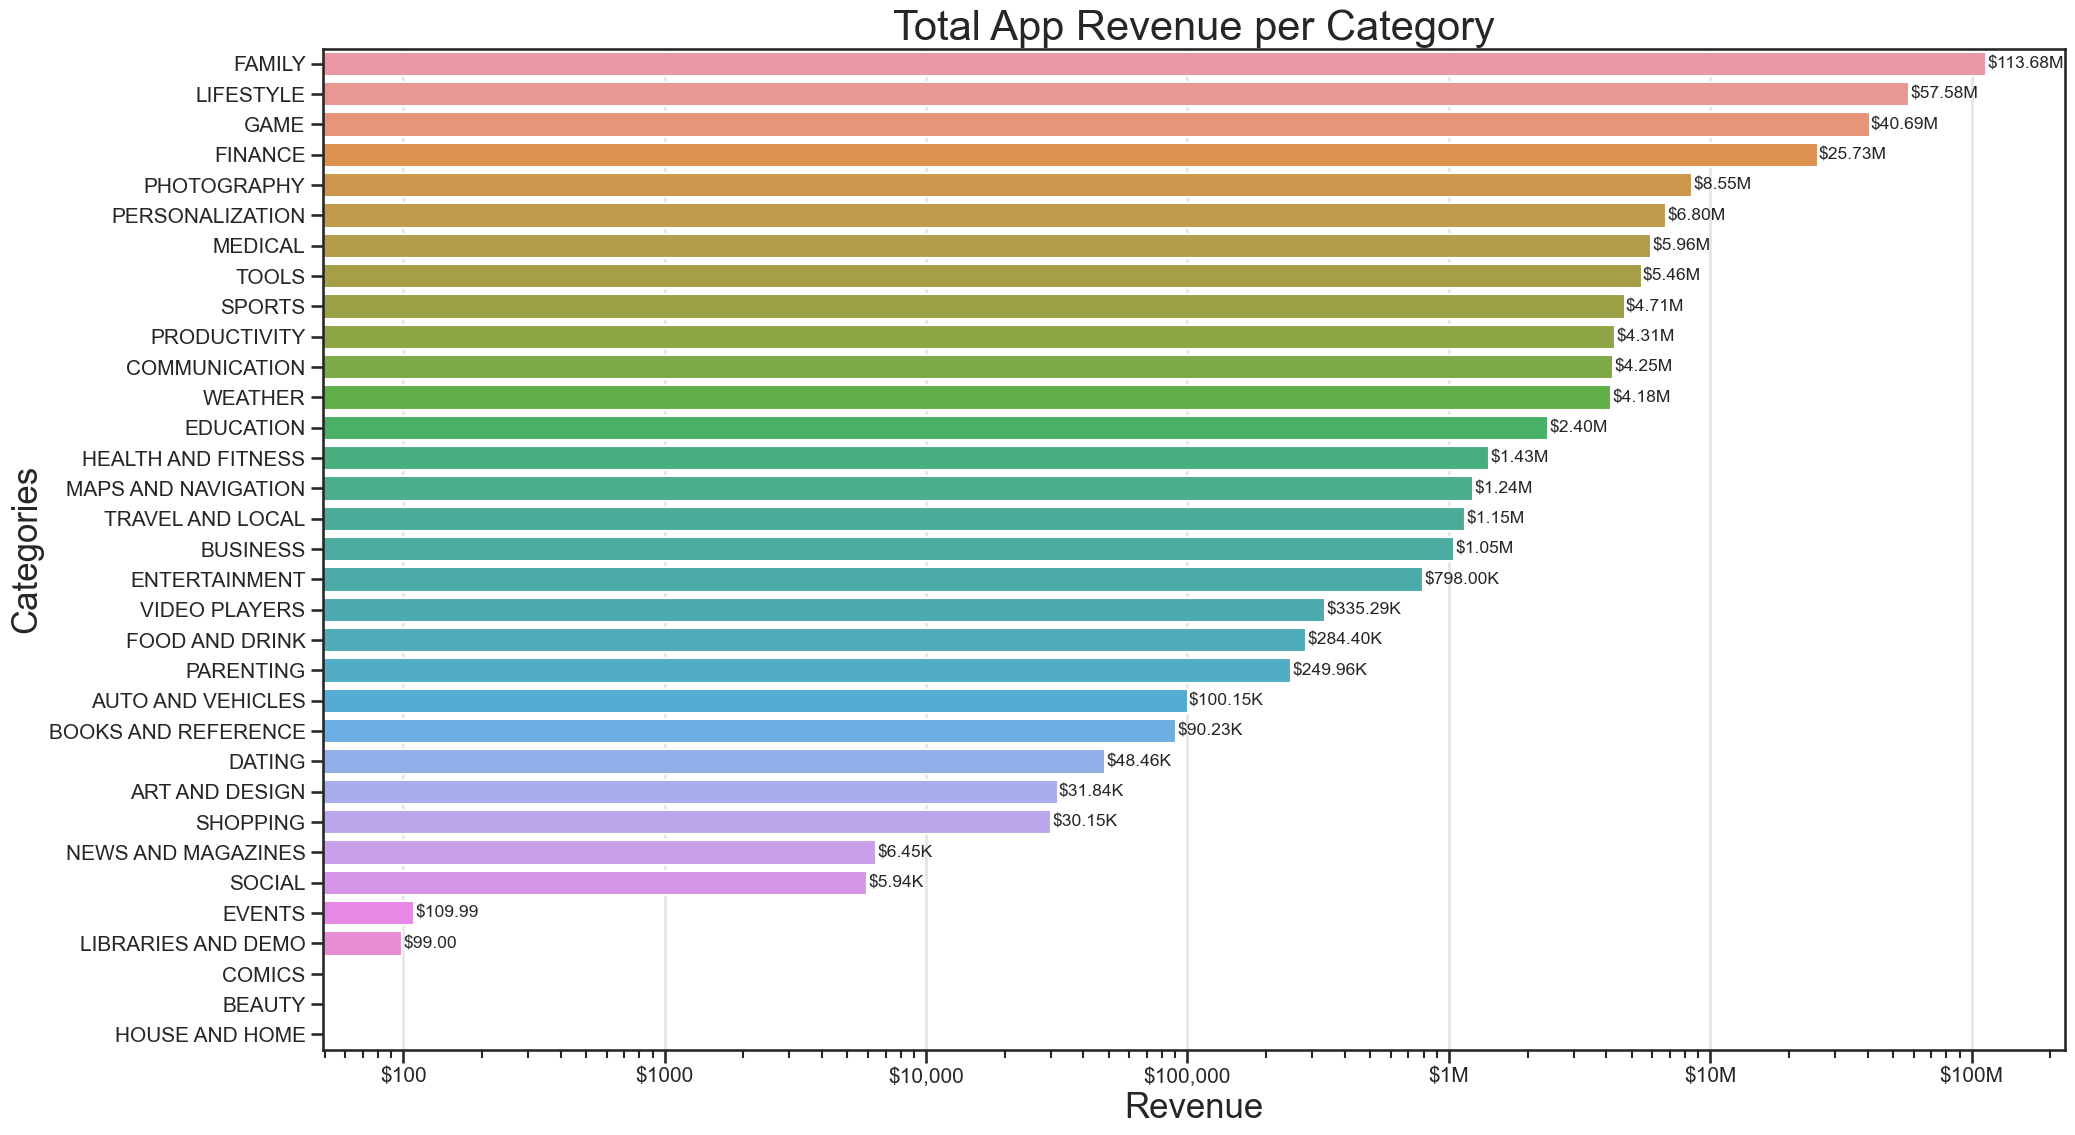

<Figure size 640x480 with 0 Axes>

In [147]:
sns.set_style("ticks")
plt.figure(figsize=(17,13))
plt.subplots_adjust(right=1.15)
sns.barplot(x="Revenue", y="Category", data=revenue_plot, orient='horizontal')
sns.set_context("talk", font_scale=0.7)
plt.title("Total App Revenue per Category", fontsize=30)
plt.ylabel("Categories", fontsize=25)
plt.xlabel("Revenue", fontsize=25)
plt.xscale("log")

xticks = [100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
xticklabels = ['$100', '$1000','$10,000','$100,000','$1M','$10M','$100M']
plt.xticks(xticks, xticklabels, fontsize = 15)
plt.yticks(fontsize=15)

# labels to the right of each bar
for i, val in enumerate(revenue_plot["Revenue"].values):
   plt.annotate(shorten_number_dollar(val), xy=(val, i), xytext=(val*1.01, i), va='center')

plt.grid(color = 'black', alpha=0.1, linewidth = 2, axis='x')
plt.show()
plt.clf()

## First version, seems nice, though the value text might be a bit too unreadable

Looking at the plot above, the text might come off as small. 

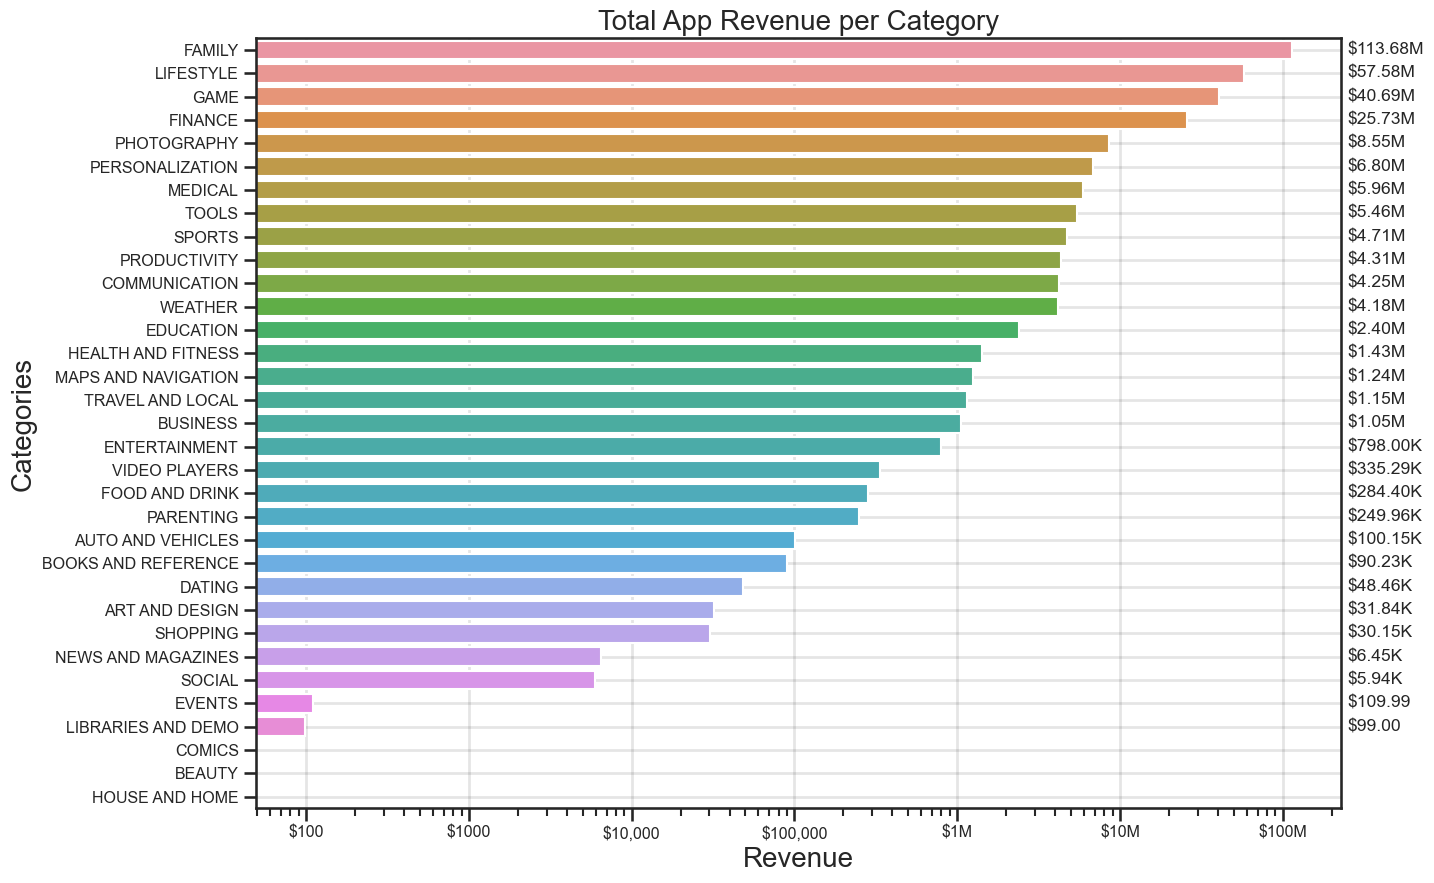

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.set_style("ticks")
plt.figure(figsize=(14,10))
sns.barplot(x="Revenue", y="Category", data=revenue_plot, orient='horizontal')
sns.set_context("talk", font_scale=0.7)
plt.title("Total App Revenue per Category", fontsize=20)
plt.ylabel("Categories", fontsize=20)
plt.xlabel("Revenue", fontsize=20)
plt.xscale("log")

xticks = [100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
xticklabels = ['$100', '$1000','$10,000','$100,000','$1M','$10M','$100M']
plt.xticks(xticks, xticklabels)

# CODE FOR SHOWING BAR VALUE NEXT TO PLOT IN LINE
for i, val in enumerate(revenue_plot["Revenue"].values):
   plt.annotate(shorten_number_dollar(val), xy=(val, i), xytext=(250000000, i), va='center', ha='left')

plt.grid(color = 'black', alpha=0.1, linewidth = 2)
plt.show()
plt.clf()

## Second version of the code, shows the text outside of the graph. 